<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/fashion_mnist_tras_lear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.fashion_mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import to_categorical
import cv2

dim: (60000, 28, 28)


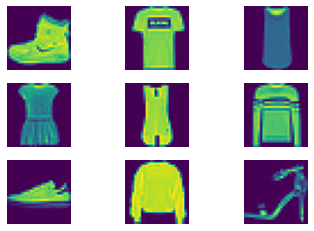

dim: (60000, 28, 28)
dim: (60000, 32, 32, 3)


In [67]:
(xtrain, ytrain),(xtest, ytest)=load_data()

print('dim:', xtrain.shape)

for i in range(9):
  plt.subplot(3,3,1+i)
  plt.imshow(xtrain[i])
  plt.axis('off')
plt.show()

def img_resize(x):
  res_x = []
  for img in x:
    res_img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    res_x.append(res_img)
  res_x = np.array(res_x)
  res_x = res_x.reshape(res_x.shape[0], 32, 32, 1).astype('float32')
  res_x = res_x.repeat(3, -1) # repeat the last (-1) dimension three times
  return res_x

print('dim:', xtrain.shape)

xtrain = img_resize(xtrain)
xtest = img_resize(xtest)

print('dim:', xtrain.shape)

# xtrain = preprocess_input(xtrain)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [63]:
# downloaded VGG16  without the classifier part
base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(32, 32, 3))   # min (224, 224, 3)
base_model.summary()

# freeze the feature extraction layers that have been trained on the ImageNet dataset
for layer in base_model.layers:
  layer.trainable = False

base_model.summary()

# save the output of the last layer of VGG16 to be the input to the next layer
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output 

x = Flatten()(last_output)
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='softmax', name='softmax')(x)

# Define a new_model that takes the input of the base model as its input and the output of the last softmax layer as an output 
new_model = Model(inputs=base_model.input, outputs=x) 

new_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [64]:
new_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = new_model.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_data=(xtest, ytest), verbose=2, shuffle=True)

Epoch 1/20
1875/1875 - 18s - loss: 0.8089 - accuracy: 0.7404 - val_loss: 0.6062 - val_accuracy: 0.7797
Epoch 2/20
1875/1875 - 18s - loss: 0.5459 - accuracy: 0.8011 - val_loss: 0.5558 - val_accuracy: 0.7963
Epoch 3/20
1875/1875 - 18s - loss: 0.5037 - accuracy: 0.8156 - val_loss: 0.5172 - val_accuracy: 0.8174
Epoch 4/20
1875/1875 - 18s - loss: 0.4795 - accuracy: 0.8248 - val_loss: 0.5276 - val_accuracy: 0.8136
Epoch 5/20
1875/1875 - 18s - loss: 0.4646 - accuracy: 0.8290 - val_loss: 0.5141 - val_accuracy: 0.8196
Epoch 6/20
1875/1875 - 18s - loss: 0.4515 - accuracy: 0.8337 - val_loss: 0.4731 - val_accuracy: 0.8308
Epoch 7/20
1875/1875 - 18s - loss: 0.4426 - accuracy: 0.8367 - val_loss: 0.5255 - val_accuracy: 0.8095
Epoch 8/20
1875/1875 - 18s - loss: 0.4336 - accuracy: 0.8404 - val_loss: 0.4949 - val_accuracy: 0.8233
Epoch 9/20
1875/1875 - 18s - loss: 0.4269 - accuracy: 0.8420 - val_loss: 0.4879 - val_accuracy: 0.8263
Epoch 10/20
1875/1875 - 18s - loss: 0.4180 - accuracy: 0.8469 - val_loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.44626004099845884
Training and validation loss    :  0.44626004099845884 0.5055673480033874
Training and validation accuracy:  0.8373216718435288 0.8212899953126908
313/313 [==============================] - 3s 9ms/step - loss: 0.4874 - accuracy: 0.8320
accuracy : [0.48739686608314514, 0.8320000171661377]


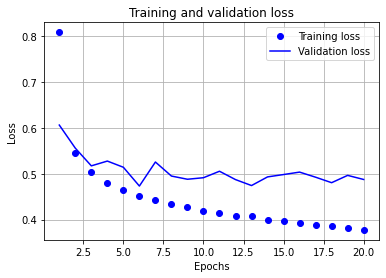

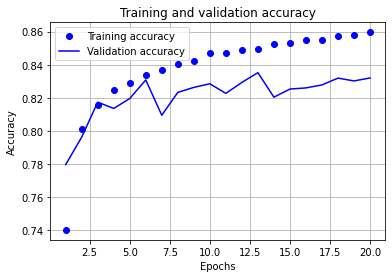

In [65]:
print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = new_model.predict(xtest)
score = new_model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [73]:
# another way for implmeneting the model
model = Sequential()
model.add(VGG16(include_top=False, weights='imagenet',input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.layers[0].trainable = False
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [74]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_data=(xtest, ytest), verbose=2, shuffle=True)

Epoch 1/20
1875/1875 - 17s - loss: 0.7683 - accuracy: 0.7511 - val_loss: 0.5795 - val_accuracy: 0.7905
Epoch 2/20
1875/1875 - 17s - loss: 0.5310 - accuracy: 0.8061 - val_loss: 0.5638 - val_accuracy: 0.7917
Epoch 3/20
1875/1875 - 17s - loss: 0.4921 - accuracy: 0.8201 - val_loss: 0.4989 - val_accuracy: 0.8157
Epoch 4/20
1875/1875 - 17s - loss: 0.4693 - accuracy: 0.8286 - val_loss: 0.4947 - val_accuracy: 0.8209
Epoch 5/20
1875/1875 - 18s - loss: 0.4513 - accuracy: 0.8350 - val_loss: 0.4946 - val_accuracy: 0.8251
Epoch 6/20
1875/1875 - 18s - loss: 0.4372 - accuracy: 0.8386 - val_loss: 0.4714 - val_accuracy: 0.8316
Epoch 7/20
1875/1875 - 18s - loss: 0.4271 - accuracy: 0.8433 - val_loss: 0.4949 - val_accuracy: 0.8240
Epoch 8/20
1875/1875 - 18s - loss: 0.4205 - accuracy: 0.8452 - val_loss: 0.4761 - val_accuracy: 0.8301
Epoch 9/20
1875/1875 - 18s - loss: 0.4102 - accuracy: 0.8495 - val_loss: 0.5077 - val_accuracy: 0.8212
Epoch 10/20
1875/1875 - 18s - loss: 0.4044 - accuracy: 0.8527 - val_loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.42855384647846223
Training and validation loss    :  0.42855384647846223 0.4946897402405739
Training and validation accuracy:  0.8441333264112473 0.8253200024366378
313/313 [==============================] - 3s 8ms/step - loss: 0.4743 - accuracy: 0.8368
accuracy : [0.47427982091903687, 0.8367999792098999]


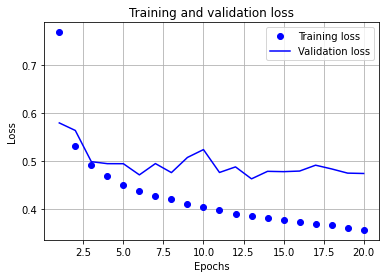

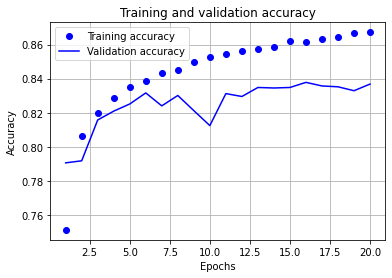

In [75]:
print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()